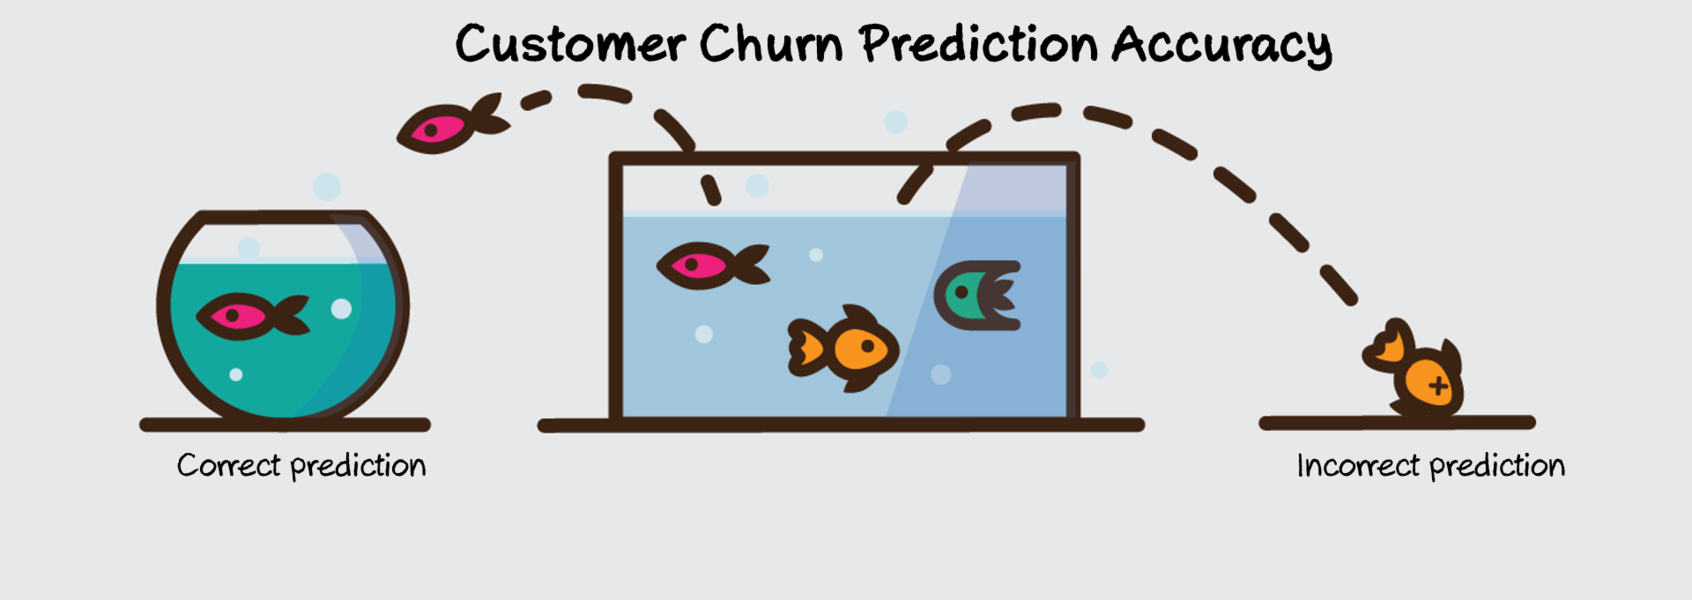

In [1]:
from IPython.display import Image
Image('churn.png')

## Data preprocessing and exploration

In [2]:
import pandas as pd #
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # MAnipulation et visualisation des stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.shape #Dimension

(10000, 14)

In [9]:
dataset.isnull() #detection des valeurs manquantes

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
dataset.isnull().sum().sum() # Nombre de valeur null

0

In [11]:
dataset.columns #Determiner la liste des colonnes

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
cols = dataset.columns.to_list()
cols

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [15]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace = True) #Pour supprimmer les colonnes axis = 1 signifie elimine les colonnes  inplace = true cest pour dire qu'on ecrase  dans le dataset principal

KeyError: "['RowNumber' 'CustomerId' 'Surname'] not found in axis"

In [19]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
dataset.shape

(10000, 11)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [22]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
dataset.describe(include='object') #recuperer unique les colonnes de type object  ou include =['object','boolean']

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [28]:
dataset.Geography.unique() # les differentes valeur disponible  pour la colonne Geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
dataset.Geography.value_counts() #Nombre de Repetitions des  differentes Valeurs

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

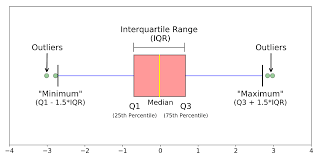

In [29]:
Image('boxplot.png', width=600)

Text(0.5, 1.0, 'CreditScore Boxplot')

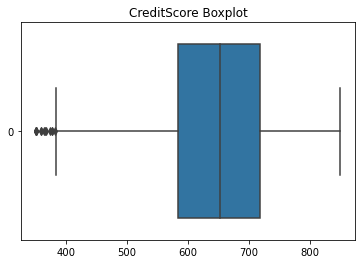

In [22]:
sns.boxplot(data = dataset.CreditScore, orient = 'h')
plt.title('CreditScore Boxplot')

In [30]:
IQR = dataset.CreditScore.quantile(0.75)-dataset.CreditScore.quantile(0.25)
IQR

134.0

In [31]:
bornInf = dataset.CreditScore.quantile(0.25)-1.5*IQR
bornInf

383.0

In [33]:
bornSup = dataset.CreditScore.quantile(0.75)+1.5*IQR
bornSup

919.0

In [34]:
dataset.loc[dataset.CreditScore<= bornInf,:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
5494,383,Spain,Female,48,8,95808.19,1,0,0,137702.01,1


In [35]:
#
dataset.loc[dataset.CreditScore<= bornInf,:]['Exited'].mean()

1.0

In [36]:
my_list = ['CreditScore','Balance','EstimatedSalary','Exited']

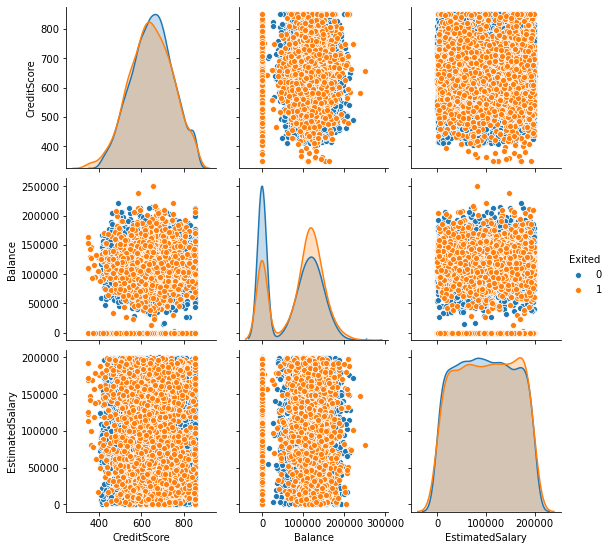

In [37]:
sns.pairplot(data = dataset[my_list],hue = 'Exited')

In [34]:
dataset.loc[dataset.CreditScore<= 400,:]['Exited'].mean()

1.0

In [36]:
dataset.shape

(10000, 11)

In [38]:
X = dataset.iloc[:,0:10]
y = dataset.iloc[:,10]

In [39]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [40]:
type(X)

pandas.core.frame.DataFrame

In [41]:
type(y)

pandas.core.series.Series

Convert DataFrame to NdArray

In [42]:
X = X.values
y = y.values

In [43]:
type(X)

numpy.ndarray

In [44]:
X[0:10,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
encoder = LabelEncoder()

In [47]:
X[:,1] = encoder.fit_transform(X[:,1])

In [48]:
X[0:10,:]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [49]:
X[:,2] = encoder.fit_transform(X[:,2])

In [50]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
ct = ColumnTransformer([('Geography', OneHotEncoder(),[1])], remainder = 'passthrough')

In [55]:
X = ct.fit_transform(X)

In [56]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [57]:
X.shape

(10000, 12)

In [58]:
if X.shape[1] == 12:
    X = X[:,1:]

In [59]:
X[0:10,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

### SUITE DU COURS DU SOIR 19 SEPTEMBRE

## split data to train  and test set

In [61]:
from  sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

In [68]:
X_test[0:5,:]

array([[0.0, 0.0, 713, 0, 52, 0, 185891.54, 1, 1, 1, 46369.57],
       [0.0, 0.0, 643, 1, 37, 6, 0.0, 2, 0, 0, 142454.77],
       [0.0, 1.0, 589, 0, 46, 10, 0.0, 2, 0, 1, 168369.37],
       [0.0, 0.0, 712, 0, 37, 1, 106881.5, 2, 0, 0, 169386.81],
       [1.0, 0.0, 564, 0, 33, 2, 115761.51, 1, 0, 1, 112350.21]],
      dtype=object)

In [71]:
print(f'TAux  de churn dans toute la base {y.mean()*100}')
print(f'TAux  de churn dans toute le test {y_test.mean()*100}')
print(f'TAux  de churn dans toute le train {y_train.mean()*100}')

TAux  de churn dans toute la base 20.369999999999997
TAux  de churn dans toute le test 20.25
TAux  de churn dans toute le train 20.4
